<a href="https://colab.research.google.com/github/ClaudioH19/TareasML/blob/master/PROYECTO_FINAL/ETAPA2_proyecto_ecg_etapa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FASE 2: PROCESAMIENTO DE DATOS Y MODELO ML**

Se usara un modelo de random forest para entrenar e intentar predecir las clases. Como los modelos de árboles de decisión trabajan con atributos, no necesitan de normalización en los datos, puesto que no afectan su rendimiento al trabajar de esta forma.

In [1]:
# Instalar gdown si no está
!pip install -q gdown

# Descargar el CSV desde Google Drive
!gdown --id 1vlBDQuCiTzxAnwnpuoXUWHtRjBFtJ_U- --output ecg_rr_features_curado.csv

# Cargar el archivo en pandas
import pandas as pd

df = pd.read_csv('ecg_rr_features_curado.csv')

# Recordar el df
df.head()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1vlBDQuCiTzxAnwnpuoXUWHtRjBFtJ_U-
To: /content/ecg_rr_features_curado.csv
100% 2.50k/2.50k [00:00<00:00, 8.51MB/s]


,id,mean_rr,std_rr,skew_rr,kurt_rr,label
0,A07912,1134.400000,36.058225,0.898910,1.144442,Normal
1,A01157,970.357143,355.889607,1.096209,-0.001675,Normal
2,A00117,854.411765,162.787645,-0.164251,-0.059193,Normal
3,A08123,902.828283,81.037553,2.289251,8.583966,Normal
4,A00647,767.192982,36.948885,0.063920,10.730166,Normal


Separamos el Dataset en las features y la clase

In [2]:
from sklearn.preprocessing import StandardScaler

# Separar features (X) y target (y)
X = df[['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']]
y = df['label']

# Mostrar las primeras filas
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())




Features (X):
       mean_rr      std_rr   skew_rr    kurt_rr
0  1134.400000   36.058225  0.898910   1.144442
1   970.357143  355.889607  1.096209  -0.001675
2   854.411765  162.787645 -0.164251  -0.059193
3   902.828283   81.037553  2.289251   8.583966
4   767.192982   36.948885  0.063920  10.730166

Target (y):
0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: label, dtype: object


Una vez estandarizado las features, procedemos a separar los datos de training y los datos de test en una proporción de 80:20, para luego crear el modelo

In [3]:
# Separar en training y testing 80:20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizamos los X_traing y los y_train
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())


X_train:
       mean_rr      std_rr   skew_rr    kurt_rr
17  952.043011  264.322597 -0.508596  -1.670519
22  775.185185  246.128598 -0.221128  -0.988345
11  917.916667   55.775779 -3.037810  11.529530
13  461.269841  141.875108  0.767705  -0.385077
15  598.775510  177.287056  1.927753   4.179296

y_train:
17      AFib
22      AFib
11    Normal
13      AFib
15      AFib
Name: label, dtype: object


Creamos el Modelo ML, usando Random Forest

In [4]:
# Creamos el modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenamos el modelo
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8333333333333334

Classification Report:
              precision    recall  f1-score   support

        AFib       0.67      1.00      0.80         2
      Normal       1.00      0.75      0.86         4

    accuracy                           0.83         6
   macro avg       0.83      0.88      0.83         6
weighted avg       0.89      0.83      0.84         6



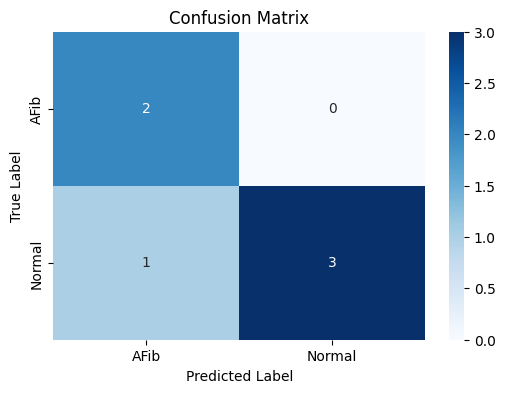

In [5]:
# Testeamos el modelo
from sklearn.metrics import accuracy_score, classification_report

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo usando accurracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Evaluar usando confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Análisis**

Vemos por la matriz que el modelo tuvo buen rendimiento al fallar solo en 1 dato, sin embargo, al ser un dataset tan pequeño, existe el riesgo (Muy probable) de que Random Forest se esté sobre ajustando a los datos, habría que probar con un conjunto de pruebas mayor para tener evidencia más sólida sobre el rendimiento

Visualizar errores y proponer ideas de mejora

/tmp/ipython-input-6-1838920506.py:61: UserWarning: Mismatched number of handles and labels: len(handles) = 4 len(labels) = 3
  g.fig.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.05, 1))


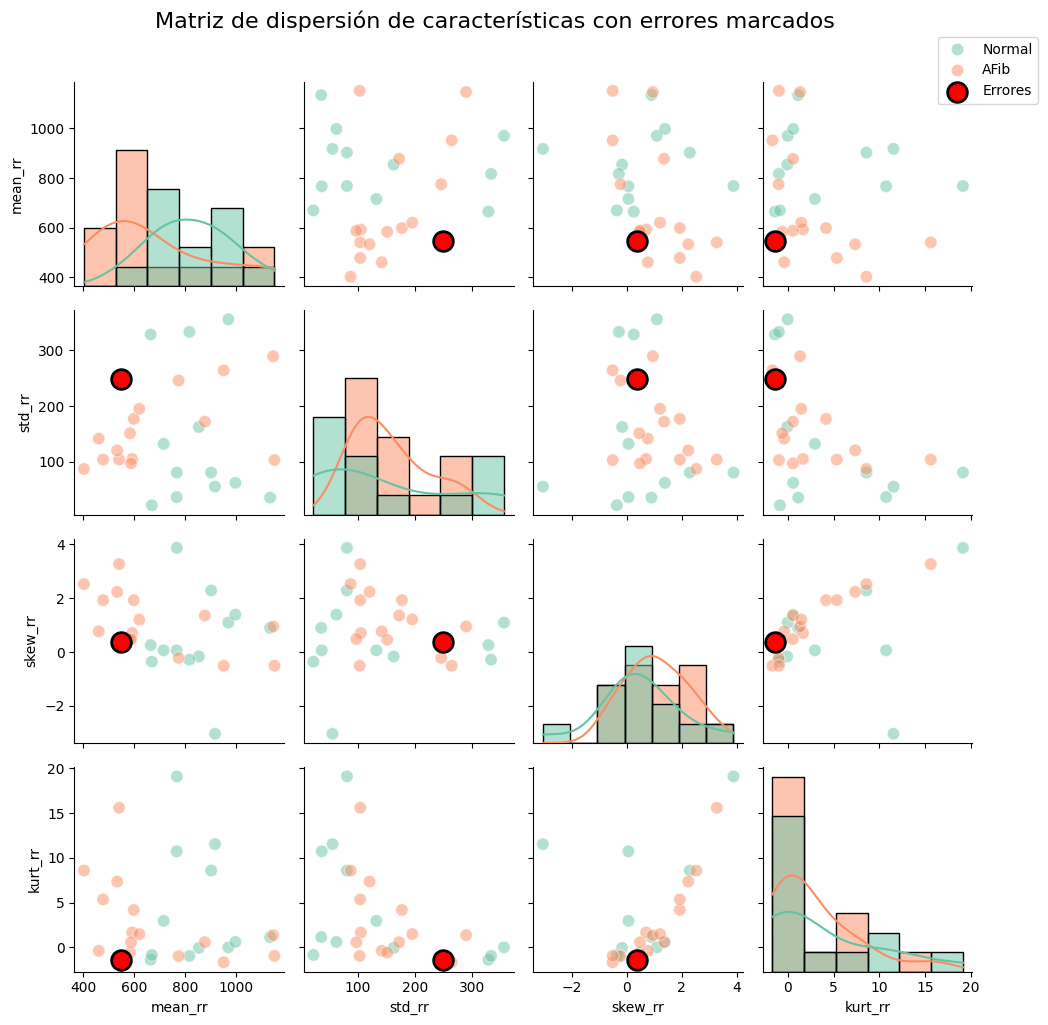

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Import numpy

# Assuming 'df' is your DataFrame, 'X_test', 'y_test', 'y_pred' are from your previous steps
# and 'errors' was defined as the misclassified instances:
# errors = df.loc[X_test.index][y_test != y_pred]

# If 'errors' is not defined, define it now:
# Make sure you have the original df with the 'label' column
# Assuming X_test.index corresponds to the indices in the original df
# Create a temporary column in df to mark errors
df_temp = df.copy() # Work on a copy to avoid modifying the original df outside the cell
df_temp['is_error'] = False
error_indices = X_test.index[y_test != y_pred]
df_temp.loc[error_indices, 'is_error'] = True

# Define the features to visualize
features_to_plot = ['mean_rr', 'std_rr', 'skew_rr', 'kurt_rr']

# Create the PairGrid
# Set hue for 'label' for the main points
g = sns.PairGrid(df_temp, vars=features_to_plot, hue='label', palette={'Normal': '#66c2a5', 'AFib': '#fc8d62'}, height=2.5)

# Map scatter plots on the lower and upper triangles
g.map_lower(sns.scatterplot, alpha=0.5, s=80)
g.map_upper(sns.scatterplot, alpha=0.5, s=80)

# Map histograms or KD plots on the diagonal
g.map_diag(sns.histplot, kde=True)

# --- Superimpose the error points on all scatter plots ---
# Filter the temporary DataFrame to get only the errors
error_df = df_temp[df_temp['is_error']]

# Iterate over each axis in the PairGrid where a scatter plot is
for i in range(len(features_to_plot)):
    for j in range(len(features_to_plot)):
        if i != j: # Check if it's not the diagonal
            ax = g.axes[i, j]
            x_col = features_to_plot[j] # Columns for x-axis
            y_col = features_to_plot[i] # Columns for y-axis

            # Superimpose the error points in red on this specific subplot
            ax.scatter(error_df[x_col], error_df[y_col], color='red', s=200, edgecolors='black', linewidth=2, label='Errores', zorder=5) # zorder to ensure visibility


# Add a single combined legend
# Get handles and labels from one of the scatter plots
handles, labels = g.axes[0, 1].get_legend_handles_labels()

# Create a handle for the 'Errores' points
error_handle = plt.Line2D([0], [0], marker='o', color='w', label='Errores',
                          markerfacecolor='red', markersize=10, markeredgecolor='black', markeredgewidth=2)

# Append the error handle to the list of handles
handles.append(error_handle)

# Create the combined legend outside the grid if needed, or on one of the axes
g.fig.legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(1.05, 1))


# Add title to the figure (optional)
g.fig.suptitle("Matriz de dispersión de características con errores marcados", y=1.02, fontsize=16)

plt.tight_layout()
plt.show()

# The temporary column 'is_error' in df_temp will be discarded after this cell
# If you need it in the original df, you would modify 'df' directly instead of 'df_temp'

Para mejorar el modelo Random Forest, se sugiere ampliar el dataset para una mejor generalización, explorar nuevas características a partir de los intervalos RR. También se recomienda usar validación cruzada para evitar sobreajuste, revisar la calidad de la detección de picos R, y aplicar técnicas para manejar el desbalance de clases en conjuntos más grandes (como el dataset original).